In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = 100
pd.options.display.max_rows = 500

In [36]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample-submission.csv', index_col='user_id')
df_items = pd.read_csv('item-features.csv', index_col='item_id').sort_index()
df_users = pd.read_csv('user-features.csv', index_col='user_id').sort_index()

MAX_USER_ID = X_train.user_id.max()
MAX_ITEM_ID = X_train.item_id.max()

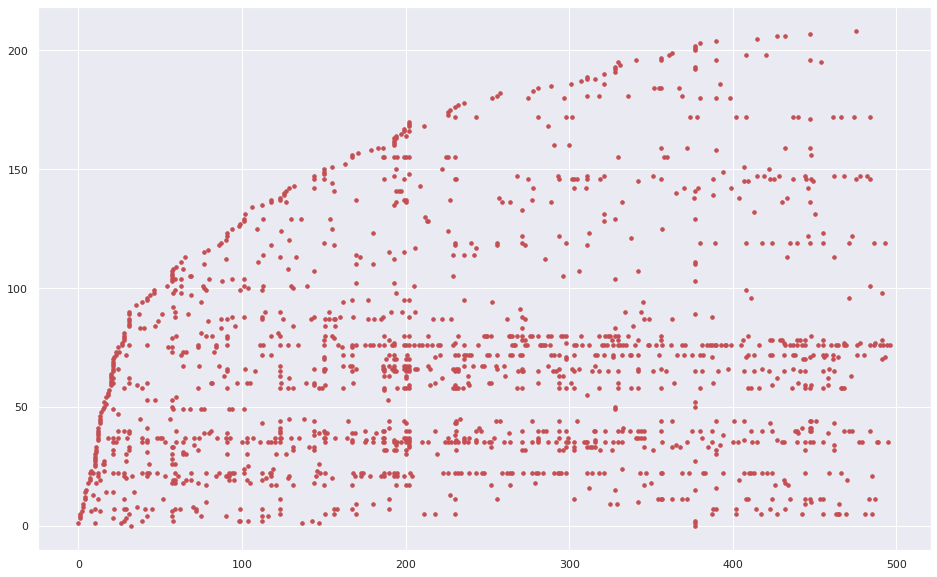

In [37]:
plt.figure(figsize=(16, 10))

plt.scatter(
    X_train[(X_train.like==1)].user_id, 
    X_train[(X_train.like==1)].item_id, marker='.', color='r', s=50)

plt.show()

In [38]:
df_izum = pd.DataFrame(df_users.to_numpy() @ df_items.to_numpy().T)*1000

In [39]:
prev_item_id = 0
selected_user_ids = []
selected_item_ids = []
for user_id in range(497):
    item_id = X_train[X_train.like==1].groupby('user_id').item_id.max()[user_id]
    if item_id > prev_item_id:
        selected_user_ids.append(user_id)
        selected_item_ids.append(item_id)
        prev_item_id = item_id

In [40]:
selected_item_ids = np.array(selected_item_ids)
selected_user_ids = np.array(selected_user_ids)
mask_1 = selected_user_ids < 30
mask_2 = selected_user_ids >= 30

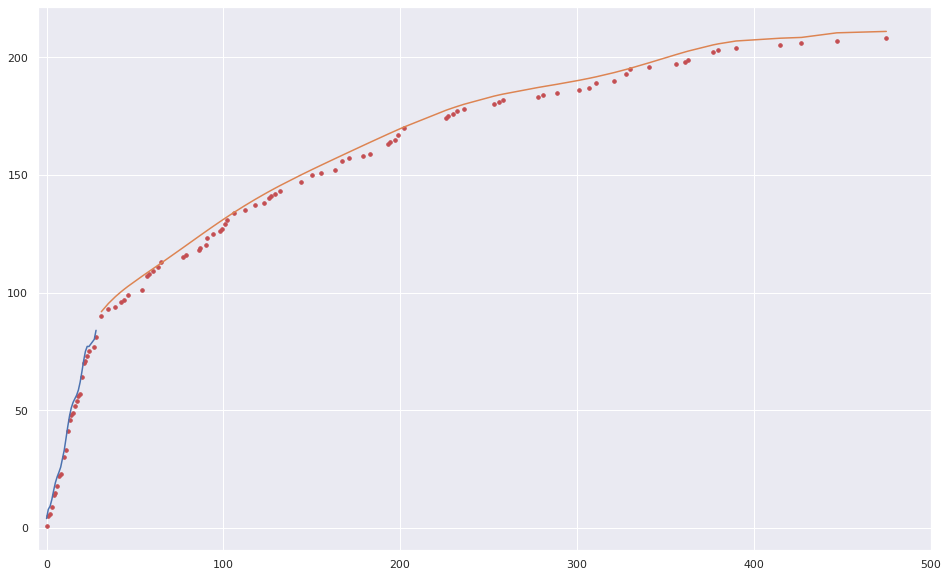

In [41]:
z1 = np.polyfit(selected_user_ids[mask_1], selected_item_ids[mask_1], 10)
f1 = np.poly1d(z1)

z2 = np.polyfit(selected_user_ids[mask_2], selected_item_ids[mask_2], 10)
f2 = np.poly1d(z2)

plt.figure(figsize=(16, 10))

plt.scatter(selected_user_ids, selected_item_ids, marker='.', color='r', s=50)

plt.plot(selected_user_ids[mask_1], f1(selected_user_ids[mask_1])+3)
plt.plot(selected_user_ids[mask_2], f2(selected_user_ids[mask_2])+3)

plt.xlim(-5, 500)

plt.show()

In [42]:
f = lambda x: f1(x)+3 if x < 30 else f2(x)+3

In [43]:
for ui in range(MAX_USER_ID+1):
    result = []
    viewed = X_train[(X_train.user_id==ui)&(X_train.like>=0)].item_id.values
    for iid in df_izum.loc[ui,:].argsort().values[::-1]:
        if iid not in viewed and iid <= f(ui):
            result.append(iid)
    if len(result) <= 20:
        df_sub.loc[ui, :len(result)] = result
    else:
        df_sub.loc[ui, :] = result[:20]

In [45]:
df_sub.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
user_id,,,,,,,,,,,,,,,,,,,,
166,76,35,37,22,60,65,80,72,66,58,7,40,11,148,36,21,5,59,146,87
26,76,35,37,22,60,65,72,66,58,7,40,11,36,21,5,59,67,32,33,19
41,76,35,37,22,60,65,80,72,66,58,40,11,36,21,5,59,87,67,32,33
286,76,35,37,22,60,65,80,72,66,58,7,11,148,36,21,5,59,146,87,67
108,76,35,37,22,60,80,72,66,58,7,40,11,36,21,5,59,87,67,32,33


In [29]:
df_sub.to_csv('izum.csv')